<a href="https://colab.research.google.com/github/kaustubh-sadekar/Colab-Notebooks/blob/master/OpenCV-Notebooks/Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Converting images from RGB to gray using OpenCV**
In this tuorial we will learn basic color conversion method of OpenCV. The topics we will cover are as follows :


1.   Converting a BGR image to gray scale image using OpenCV.
2.   Converting a BGR image to gray scale using numpy.


In [2]:
# Run this block to files needed for this tutorial
!git clone https://github.com/kaustubh-sadekar/DataFolder.git

Cloning into 'DataFolder'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


## Part 1 : Reading, displaying and saving an image using OpenCV

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

Printing the shape of BRG image
(683, 1024, 3)
Printing shape of gray scale image
(683, 1024)


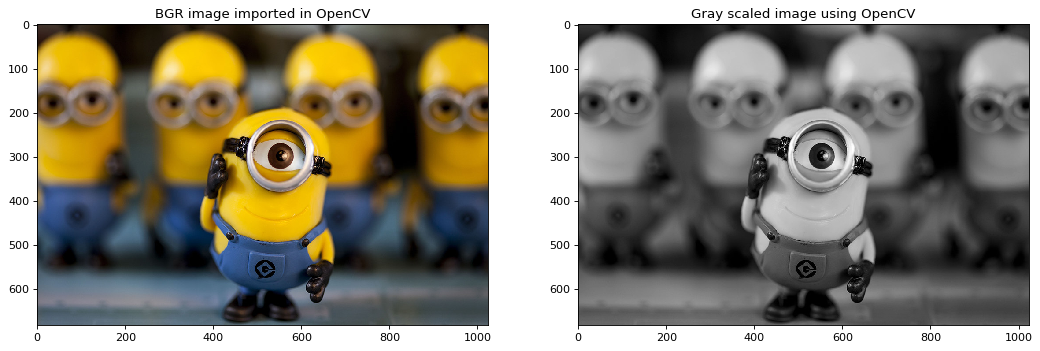

In [18]:

# State the path/location of the image you want to read
img_path = '/content/DataFolder/colab-images/minions1.jpg'

# We read the image from a desired path (img_path) and save it an array (image)
image = cv2.imread(img_path)

print("Printing the shape of BRG image")
print(image.shape)

# Converting BGR to gray using OpenCV method
gray1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

print("Printing shape of gray scale image")
print(gray1.shape)

f = plt.figure(num=None, figsize=(16, 12), dpi=80)
ax1 = f.add_subplot(1,2, 1)
plt.imshow(image[:,:,::-1])
ax2 = f.add_subplot(1,2, 2)
plt.imshow(gray1,cmap="gray")
ax1.title.set_text('BGR image imported in OpenCV')
ax2.title.set_text('Gray scaled image using OpenCV')
plt.show(block=True)

**NOTE:** How do we get the gray scaled image ?? Why is it a 2D image and not a 3D image ?? Are we considering all the three channels values of each pixel while generating the gray scaled image ??

#### Different Gray Scale Conversion Ratios
Gray scale image is obtained by using all three channel values of each pixel. The final gray value is a function of the R,G,B value of that corresponding pixel. Some of the common conversion functions are as follows:

1.   **Lightness mehtod** : It averages the most prominent and least porminent color.
2.   **Average method** : It simply averages all the channel values.
3.   **Luminosity method** : It performs a weighted average over the RGB values with the following ratio.
`gray = 0.21 R + 0.72 G + 0.07 B` [reference](https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/)
4.   **OpenCV like averaging** : OpenCV method of cvtColor uses a different ratio of RGB values as follows.
`gray = 0.299 R + 0.587 G + 0.114 B`

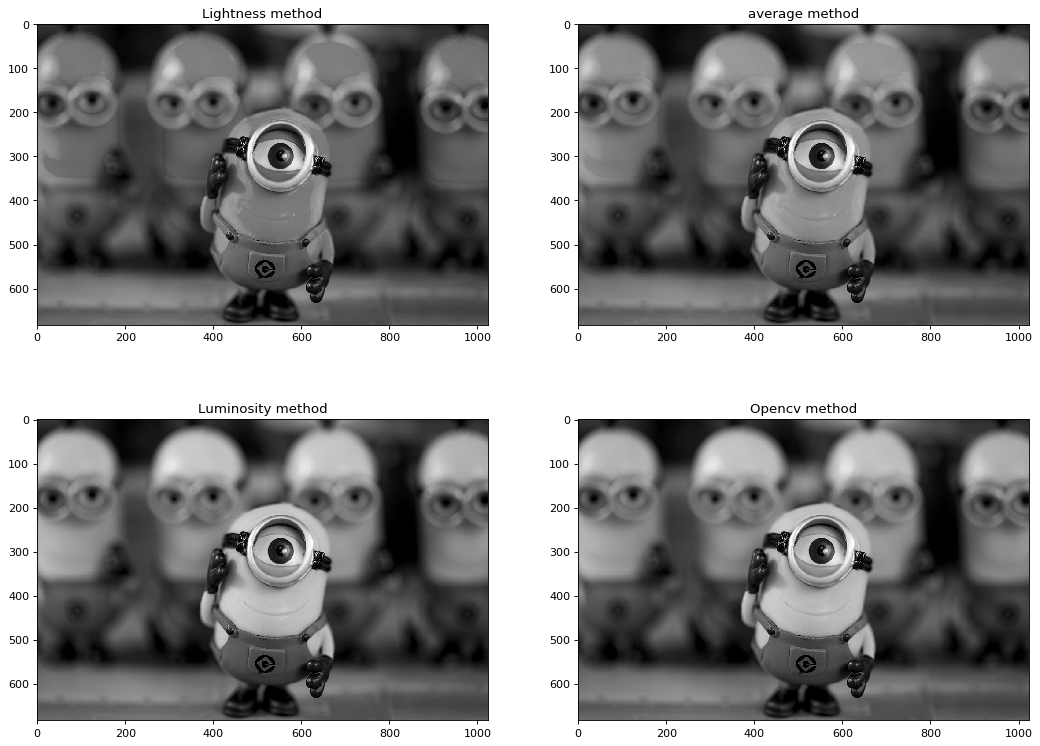

In [19]:
# Implimenting different gray scale values

gray_lightness = (np.max(image,axis=2)*0.5 + np.min(image,axis=2)*0.5)
# gray_lightness = (np.max(image,axis=2) + np.min(image,axis=2))/2 # Try to uncomment this and see what happens
# NOTE : Always make sure you consider the pixel saturation conditions at any computation stage. 
gray_average = np.sum(image,axis=2)/3
gray_lum = image[:,:,2]*0.21 + image[:,:,1]*0.72 + image[:,:,0]*0.07
gray_opencv = image[:,:,2]*0.299 + image[:,:,1]*0.587 + image[:,:,0]*0.114

f = plt.figure(num=None, figsize=(16, 12), dpi=80)
ax1 = f.add_subplot(2,2, 1)
plt.imshow(gray_lightness,cmap="gray")
ax1.title.set_text('Lightness method')

ax2 = f.add_subplot(2,2, 2)
plt.imshow(gray_average,cmap="gray")
ax2.title.set_text('average method')

ax3 = f.add_subplot(2,2, 3)
plt.imshow(gray_lum,cmap="gray")
ax3.title.set_text('Luminosity method')

ax4 = f.add_subplot(2,2, 4)
plt.imshow(gray_opencv,cmap="gray")
ax4.title.set_text('Opencv method')

plt.show()